In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


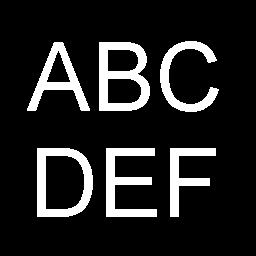

In [6]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/abcdef.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

In [11]:
numLables, labels = cv2.connectedComponents(gImg)
print(numLables)

7


In [12]:
print(labels.shape)
print(labels)

(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


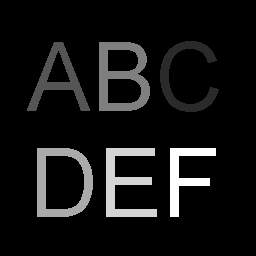

In [13]:
label_H = np.uint8(labels * 255 / np.max(labels))
cv2_imshow(label_H)

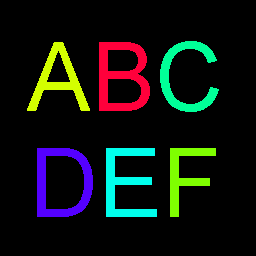

In [15]:
bank =  255*np.ones_like(label_H)
labelImg = cv2.merge([label_H, bank, bank])
labelImg = cv2.cvtColor(labelImg, cv2.COLOR_HSV2RGB)
labelImg[label_H == 0] = 0
cv2_imshow(labelImg)

(256, 256, 3)


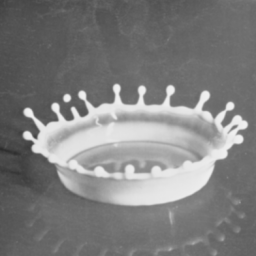

In [18]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/milkdrop.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

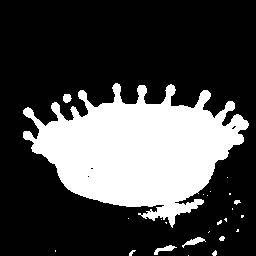

In [19]:
ret, thresh = cv2.threshold(gImg, 127, 255, 0)
cv2_imshow(thresh)

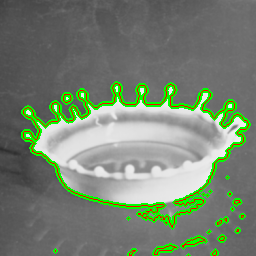

In [26]:
contour, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img2 = cv2.drawContours(img, contour, -1, (0, 0, 255), 1)
cv2_imshow(img2)